In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns
font = {'size'   : 16}

matplotlib.rc('font', **font)

# %matplotlib widget

%matplotlib inline

## non-sep

$\rho$ and $u$ are both of shape (33,33), where the first column and the first row represent locations and time, respectively; this means the value of $rho$ ($u$) is of shape (32,32)

$V$ is of shape (33,34), with an extra time step

## rho

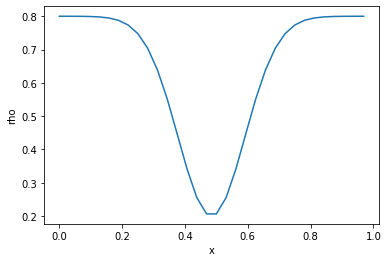

Text(0.5, 1, 'Non-sep: rho')

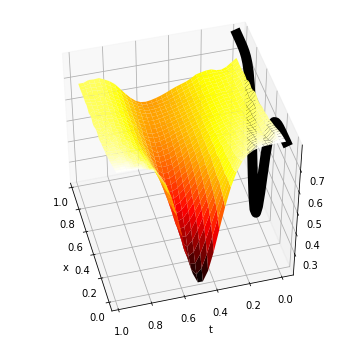

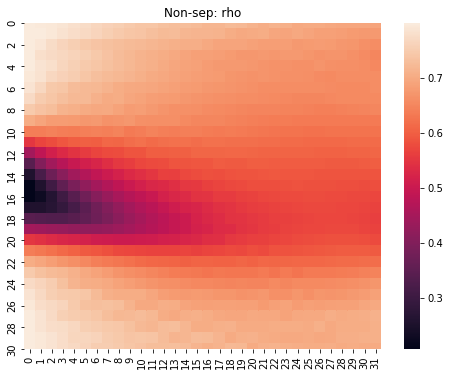

In [2]:
rho_x_t = np.loadtxt("data_rho_non_sep.csv", delimiter=',')
x = rho_x_t[1:,0]
t = rho_x_t[0,1:]
rho = rho_x_t[1:,1:]

# plot initial condition
plt.plot(x, rho[:,0])
plt.xlabel('x')
plt.ylabel('rho')
plt.show()

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')


# Plot a 3D surface
my_cmap = plt.get_cmap('hot')
xx, tt = np.meshgrid(x, t, indexing='xy')
ax.plot_surface(xx, tt, rho,
               edgecolor='none',
               cmap=my_cmap)


# plot the initial condition
x0 = x
t0 = np.zeros_like(x)
ax.plot(x0, t0, rho[:,0], '-k', linewidth=10)

ax.view_init(45, 165)
ax.set_xlabel('x')
ax.set_ylabel('t')

plt.figure(figsize=(8,6))
sns.heatmap(rho)
plt.title("Non-sep: rho")

## u

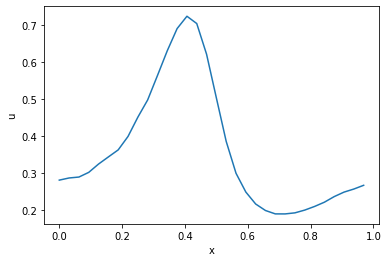

Text(0.5, 1, 'Non-sep: u')

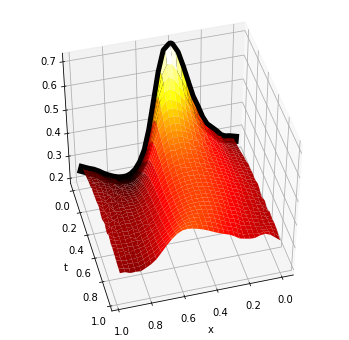

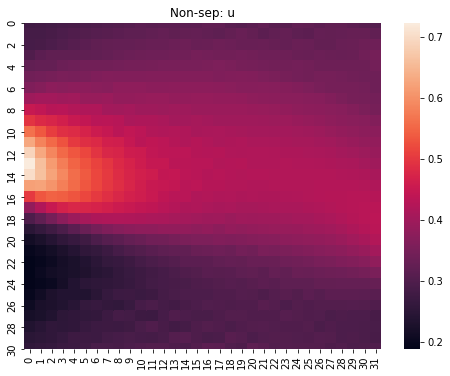

In [258]:
u_x_t = np.loadtxt("data_u_non_sep.csv", delimiter=',')
x = u_x_t[1:,0]
t = u_x_t[0,1:]
u = u_x_t[1:,1:]

# plot initial condition
plt.plot(x, u[:,0])
plt.xlabel('x')
plt.ylabel('u')
plt.show()

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')


# Plot a 3D surface
my_cmap = plt.get_cmap('hot')
xx, tt = np.meshgrid(x, t, indexing='ij')
ax.plot_surface(xx, tt, u,
               edgecolor='none',
               cmap=my_cmap)


# plot the initial condition
x0 = x
t0 = np.zeros_like(x)
ax.plot(x0, t0, u[:,0], '-k', linewidth=10)

ax.view_init(45, 75)
ax.set_xlabel('x')
ax.set_ylabel('t')

plt.figure(figsize=(8,6))
sns.heatmap(u)
plt.title("Non-sep: u")

## V

In [246]:
V_x_t.shape

(33, 34)

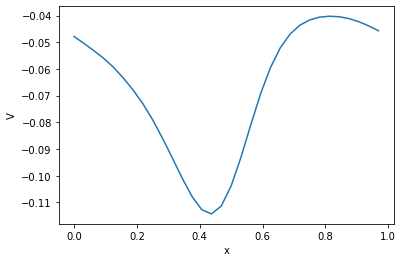

Text(0.5, 1, 'Non-sep: V')

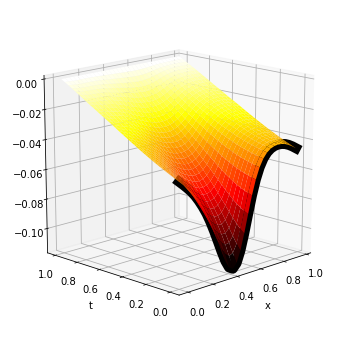

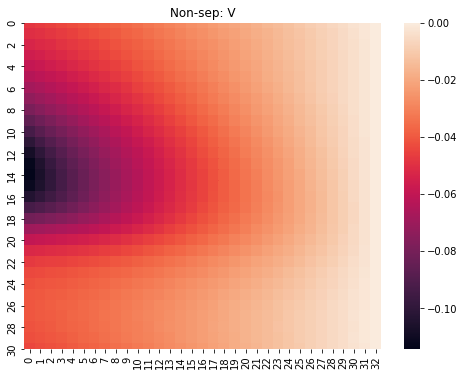

In [269]:
V_x_t = np.loadtxt("data_V_non_sep.csv", delimiter=',')
x = V_x_t[1:,0]
t = V_x_t[0,1:]
V = V_x_t[1:,1:]

# plot initial condition
plt.plot(x, V[:,0])
plt.xlabel('x')
plt.ylabel('V')
plt.show()

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')


# Plot a 3D surface
my_cmap = plt.get_cmap('hot')
xx, tt = np.meshgrid(x, t, indexing='ij')
ax.plot_surface(xx, tt, V,
               edgecolor='none',
               cmap=my_cmap)


# plot the initial condition
x0 = x
t0 = np.zeros_like(x)
ax.plot(x0, t0, V[:,0], '-k', linewidth=10)

ax.view_init(15, 225)
ax.set_xlabel('x')
ax.set_ylabel('t')

plt.figure(figsize=(8,6))
sns.heatmap(V)
plt.title("Non-sep: V")

## Check the MFG equation (Non-sep)

(1) Flow-conservation law ($f_1$)
$$
\rho_t + (\rho u)_x = 0
$$
(2) HJB equations ($f_2$ and $f_3$)
$$
V_t + uV_x + \frac{1}{2} (\frac{u}{u_{max}})^2 - \frac{u}{u_{max}} + \frac{u \rho}{u_{max} \rho_{jam}}=0 \\
u = max\{ min \{ u_{max}(1-\frac{\rho}{\rho_{jam}}-u_{max}V_x), u_{max} \}, 0 \}
$$

Text(0.5, 0, 't')

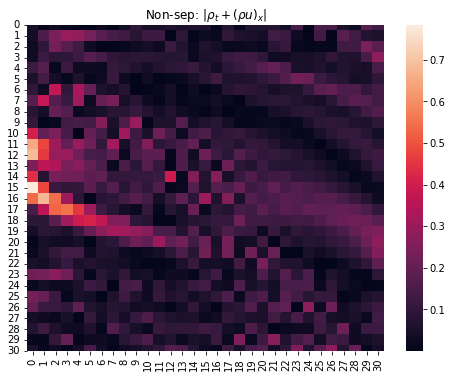

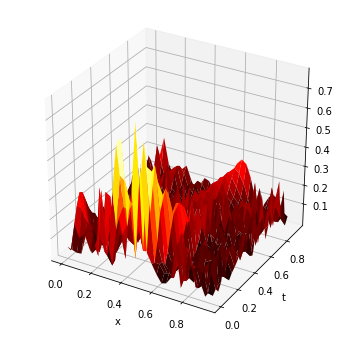

In [271]:
rho_x_t = np.loadtxt("data_rho_non_sep.csv", delimiter=',')
x = rho_x_t[1:,0]
t = rho_x_t[0,1:]
rho = rho_x_t[1:,1:]

u_x_t = np.loadtxt("data_u_non_sep.csv", delimiter=',')
x = u_x_t[1:,0]
t = u_x_t[0,1:]
u = u_x_t[1:,1:]


RHO_JAM = 1
U_MAX = 1

rho_t = (rho[:,1:] - rho[:,:-1]) / (t[1]-t[0])
rho_t = rho_t[:-1,:] # shape (31, 31)

q = rho*u
q_x = (q[1:,:] - q[:-1,:]) / (x[1] - x[0])
q_x = q_x[:,:-1] # shape (31, 31)

# f1
f1 = rho_t + q_x
plt.figure(figsize=(8,6))
sns.heatmap(np.abs(f1))
plt.title(r"Non-sep: $|\rho_t + (\rho u)_x|$")


fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')


# Plot a 3D surface
my_cmap = plt.get_cmap('hot')
xx, tt = np.meshgrid(x[:-1], t[:-1], indexing='ij')
ax.plot_surface(xx, tt, np.abs(f1),
               edgecolor='none',
               cmap=my_cmap)
ax.set_xlabel('x')
ax.set_ylabel('t')

below we check the $f_2$
$$
V_t + uV_x + \frac{1}{2} (\frac{u}{u_{max}})^2 - \frac{u}{u_{max}} + \frac{u \rho}{u_{max} \rho_{jam}}=0
$$

Text(0.5, 0, 't')

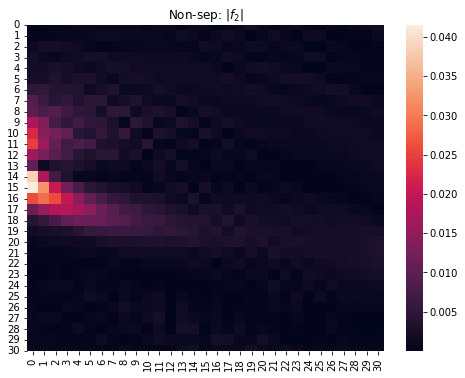

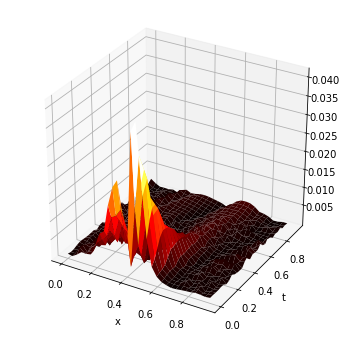

In [272]:
# f2
V_x_t = np.loadtxt("data_V_non_sep.csv", delimiter=',')
x = V_x_t[1:,0]
t = V_x_t[0,1:]
V = V_x_t[1:,1:]

V_t = (V[:,1:] - V[:,:-1]) / (t[1]-t[0])
V_t = V_t[:-1,:-1] # shape (31, 31)

V_x = (V[1:,:] - V[:-1,:]) / (x[1] - x[0])
V_x = V_x[:,:-2] # shape (31, 31)

u_trunc = u[:-1,:-1]
rho_trunc = rho[:-1,:-1]

f2 = V_t + u_trunc*V_x + 0.5*(u_trunc/U_MAX)**2 - u_trunc/U_MAX + u_trunc*rho_trunc/U_MAX/RHO_JAM

plt.figure(figsize=(8,6))
sns.heatmap(np.abs(f2))
plt.title(r"Non-sep: $|f_2|$")


fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')


# Plot a 3D surface
my_cmap = plt.get_cmap('hot')
xx, tt = np.meshgrid(x[:-1], t[:-2], indexing='ij')
ax.plot_surface(xx, tt, np.abs(f2),
               edgecolor='none',
               cmap=my_cmap)
ax.set_xlabel('x')
ax.set_ylabel('t')

below we check the $f_3$
$$
u = max\{ min \{ u_{max}(1-\frac{\rho}{\rho_{jam}}-u_{max}V_x), u_{max} \}, 0 \}
$$

Text(0.5, 0, 't')

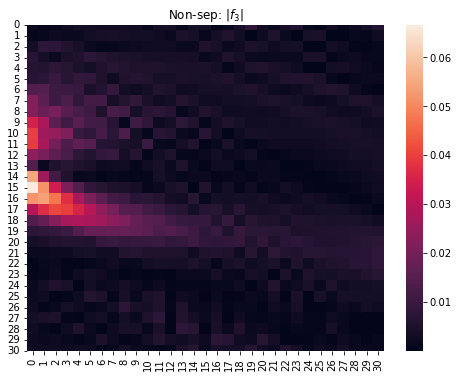

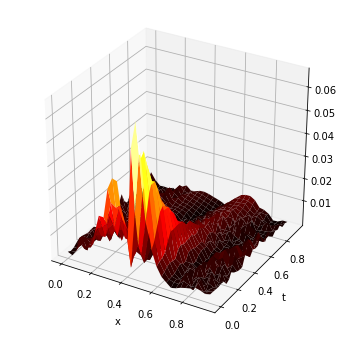

In [274]:
f_3 = U_MAX * ( 1 - rho_trunc/RHO_JAM -U_MAX*V_x)
f_3 = np.clip(f_3, 0, U_MAX)
f_3 = u_trunc - f_3

plt.figure(figsize=(8,6))
sns.heatmap(np.abs(f_3))
plt.title(r"Non-sep: $|f_3|$")


fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')


# Plot a 3D surface
my_cmap = plt.get_cmap('hot')
xx, tt = np.meshgrid(x[:-1], t[:-2], indexing='ij')
ax.plot_surface(xx, tt, np.abs(f_3),
               edgecolor='none',
               cmap=my_cmap)
ax.set_xlabel('x')
ax.set_ylabel('t')

# ============= Sep ================

## rho

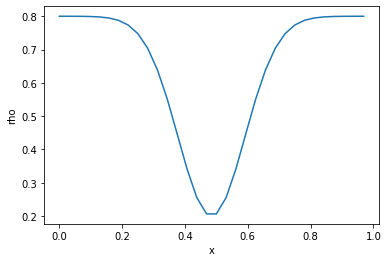

Text(0.5, 1, 'Sep: rho')

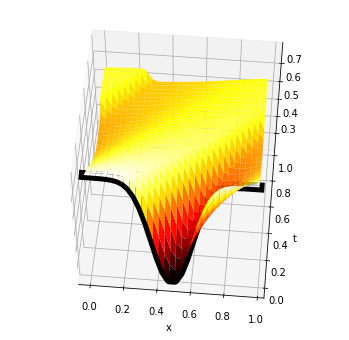

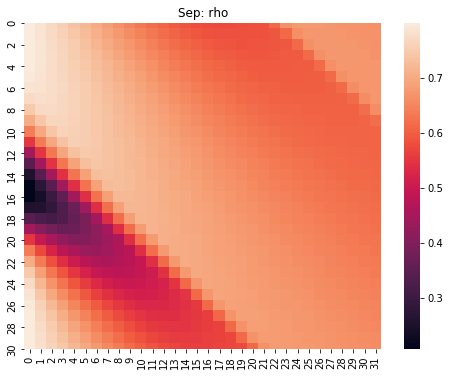

In [280]:
rho_x_t = np.loadtxt("data_rho_sep.csv", delimiter=',')
x = rho_x_t[1:,0]
t = rho_x_t[0,1:]
rho = rho_x_t[1:,1:]

# plot initial condition
plt.plot(x, rho[:,0])
plt.xlabel('x')
plt.ylabel('rho')
plt.show()

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')


# Plot a 3D surface
my_cmap = plt.get_cmap('hot')
xx, tt = np.meshgrid(x, t, indexing='ij')
ax.plot_surface(xx, tt, rho,
               edgecolor='none',
               cmap=my_cmap)
# plot the initial condition
x0 = x
t0 = np.zeros_like(x)
ax.plot(x0, t0, rho[:,0], '-k', linewidth=10)

ax.view_init(55, -85)
ax.set_xlabel('x')
ax.set_ylabel('t')

plt.figure(figsize=(8,6))
sns.heatmap(rho)
plt.title("Sep: rho")

## u

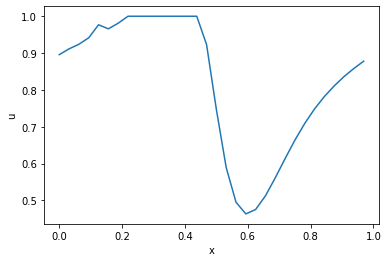

Text(0.5, 1, 'Sep: u')

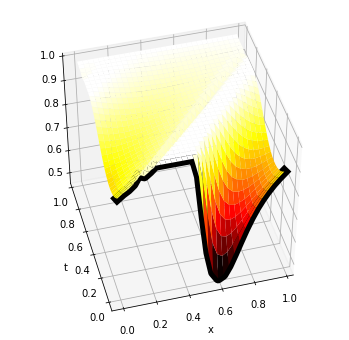

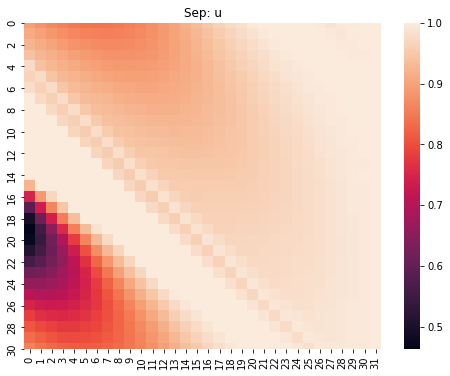

In [281]:
u_x_t = np.loadtxt("data_u_sep.csv", delimiter=',')
x = u_x_t[1:,0]
t = u_x_t[0,1:]
u = u_x_t[1:,1:]

# plot initial condition
plt.plot(x, u[:,0])
plt.xlabel('x')
plt.ylabel('u')
plt.show()

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')


# Plot a 3D surface
my_cmap = plt.get_cmap('hot')
xx, tt = np.meshgrid(x, t, indexing='ij')
ax.plot_surface(xx, tt, u,
               edgecolor='none',
               cmap=my_cmap)


# plot the initial condition
x0 = x
t0 = np.zeros_like(x)
ax.plot(x0, t0, u[:,0], '-k', linewidth=10)

ax.view_init(45, -105)
ax.set_xlabel('x')
ax.set_ylabel('t')

plt.figure(figsize=(8,6))
sns.heatmap(u)
plt.title("Sep: u")

## V

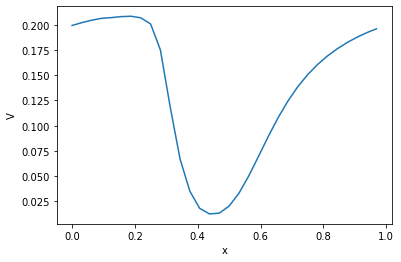

Text(0.5, 1, 'Non-sep: V')

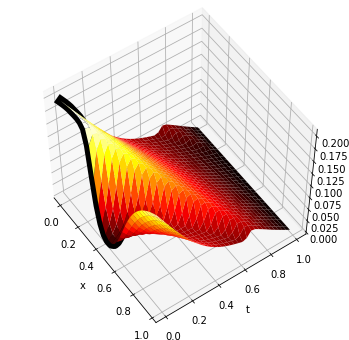

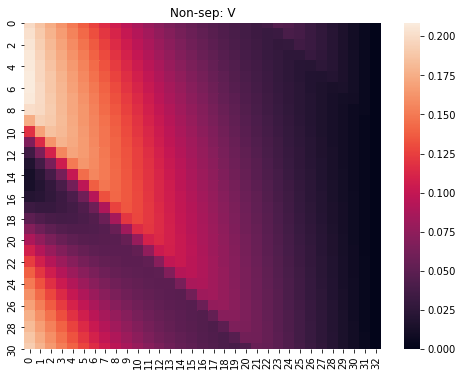

In [214]:
V_x_t = np.loadtxt("data_V_sep.csv", delimiter=',')
x = V_x_t[1:,0]
t = V_x_t[0,1:]
V = V_x_t[1:,1:]

# plot initial condition
plt.plot(x, V[:,0])
plt.xlabel('x')
plt.ylabel('V')
plt.show()

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')


# Plot a 3D surface
my_cmap = plt.get_cmap('hot')
xx, tt = np.meshgrid(x, t, indexing='ij')
ax.plot_surface(xx, tt, V,
               edgecolor='none',
               cmap=my_cmap)


# plot the initial condition
x0 = x
t0 = np.zeros_like(x)
ax.plot(x0, t0, V[:,0], '-k', linewidth=10)

ax.view_init(55, 325)
ax.set_xlabel('x')
ax.set_ylabel('t')

plt.figure(figsize=(8,6))
sns.heatmap(V)
plt.title("Non-sep: V")

## Check the MFG equation (Sep)

(1) Flow-conservation law ($f_1$)
$$
\rho_t + (\rho u)_x = 0
$$
(2) HJB equations ($f_2$ and $f_3$)
$$
V_t + uV_x + \frac{1}{2} (\frac{u}{u_{max}})^2 - \frac{u}{u_{max}} + \frac{\rho}{ \rho_{jam}}=0 \\
u = max\{ min \{ u_{max}(1-u_{max}V_x), u_{max} \}, 0 \}
$$

Text(0.5, 0, 't')

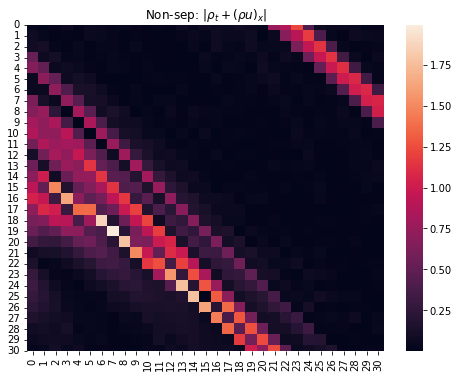

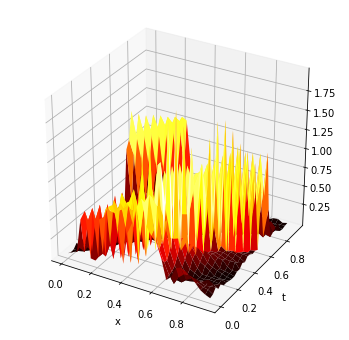

In [275]:
rho_x_t = np.loadtxt("data_rho_sep.csv", delimiter=',')
x = rho_x_t[1:,0]
t = rho_x_t[0,1:]
rho = rho_x_t[1:,1:]

u_x_t = np.loadtxt("data_u_sep.csv", delimiter=',')
x = u_x_t[1:,0]
t = u_x_t[0,1:]
u = u_x_t[1:,1:]


RHO_JAM = 1
U_MAX = 1

rho_t = (rho[:,1:] - rho[:,:-1]) / (t[1]-t[0])
rho_t = rho_t[:-1,:] # shape (31, 31)

q = rho*u
q_x = (q[1:,:] - q[:-1,:]) / (x[1] - x[0])
q_x = q_x[:,:-1] # shape (31, 31)

# f1
f1 = rho_t + q_x
plt.figure(figsize=(8,6))
sns.heatmap(np.abs(f1))
plt.title(r"Non-sep: $|\rho_t + (\rho u)_x|$")


fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')


# Plot a 3D surface
my_cmap = plt.get_cmap('hot')
xx, tt = np.meshgrid(x[:-1], t[:-1], indexing='ij')
ax.plot_surface(xx, tt, np.abs(f1),
               edgecolor='none',
               cmap=my_cmap)
ax.set_xlabel('x')
ax.set_ylabel('t')

below we check the $f_2$
$$
V_t + uV_x + \frac{1}{2} (\frac{u}{u_{max}})^2 - \frac{u}{u_{max}} + \frac{ \rho}{ \rho_{jam}}=0
$$

Text(0.5, 0, 't')

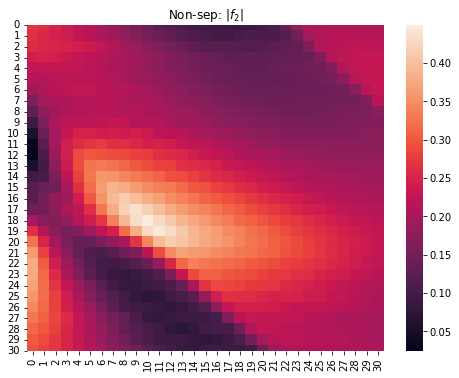

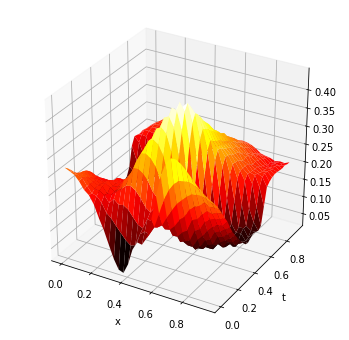

In [277]:
# f2
V_x_t = np.loadtxt("data_V_non_sep.csv", delimiter=',')
x = V_x_t[1:,0]
t = V_x_t[0,1:]
V = V_x_t[1:,1:]

V_t = (V[:,1:] - V[:,:-1]) / (t[1]-t[0])
V_t = V_t[:-1,:-1] # shape (31, 31)

V_x = (V[1:,:] - V[:-1,:]) / (x[1] - x[0])
V_x = V_x[:,:-2] # shape (31, 31)

u_trunc = u[:-1,:-1]
rho_trunc = rho[:-1,:-1]

f2 = V_t + u_trunc*V_x + 0.5*(u_trunc/U_MAX)**2 - u_trunc/U_MAX + rho_trunc/RHO_JAM

plt.figure(figsize=(8,6))
sns.heatmap(np.abs(f2))
plt.title(r"Non-sep: $|f_2|$")


fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')


# Plot a 3D surface
my_cmap = plt.get_cmap('hot')
xx, tt = np.meshgrid(x[:-1], t[:-2], indexing='ij')
ax.plot_surface(xx, tt, np.abs(f2),
               edgecolor='none',
               cmap=my_cmap)
ax.set_xlabel('x')
ax.set_ylabel('t')

below we check the $f_3$
$$
u = max\{ min \{ u_{max}(1-u_{max}V_x), u_{max} \}, 0 \}
$$

Text(0.5, 0, 't')

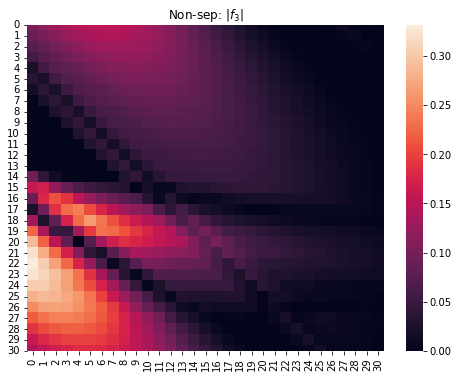

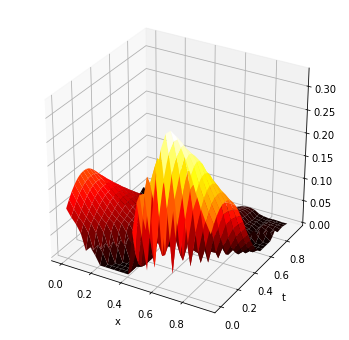

In [279]:
f_3 = U_MAX * ( 1-U_MAX*V_x)
f_3 = np.clip(f_3, 0, U_MAX)
f_3 = u_trunc - f_3

plt.figure(figsize=(8,6))
sns.heatmap(np.abs(f_3))
plt.title(r"Non-sep: $|f_3|$")


fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')


# Plot a 3D surface
my_cmap = plt.get_cmap('hot')
xx, tt = np.meshgrid(x[:-1], t[:-2], indexing='ij')
ax.plot_surface(xx, tt, np.abs(f_3),
               edgecolor='none',
               cmap=my_cmap)
ax.set_xlabel('x')
ax.set_ylabel('t')

In [315]:
X, T = np.meshgrid(np.arange(10),t, indexing='ij')

In [316]:
X

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
       [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
       [6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
        6, 6, 6, 6, 6, 6, 6, 6, 6, 6],
       [7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
        7, 7, 7, 7, 7, 7, 7, 7, 7, 7],
       [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
        8, 8, 8, 8, 8,

In [318]:
X_flatten = X.flatten()

In [319]:
X_flatten

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,

In [320]:
X_flatten.reshape((10,len(t)))

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
       [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
       [6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
        6, 6, 6, 6, 6, 6, 6, 6, 6, 6],
       [7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
        7, 7, 7, 7, 7, 7, 7, 7, 7, 7],
       [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
        8, 8, 8, 8, 8,